<a href="https://colab.research.google.com/github/Naditya206/Machine-Learning/blob/main/TG4_244107023008_NADITYA_PRASTIA_ANDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

## 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

    1. Gunakan data 'Mall_Customers.csv'

    2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

    3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

Data Awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


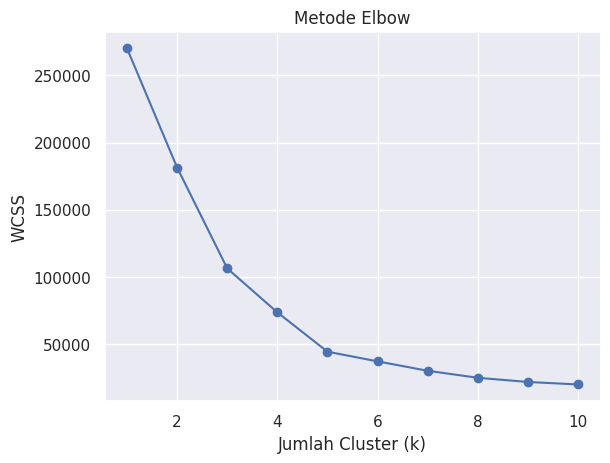

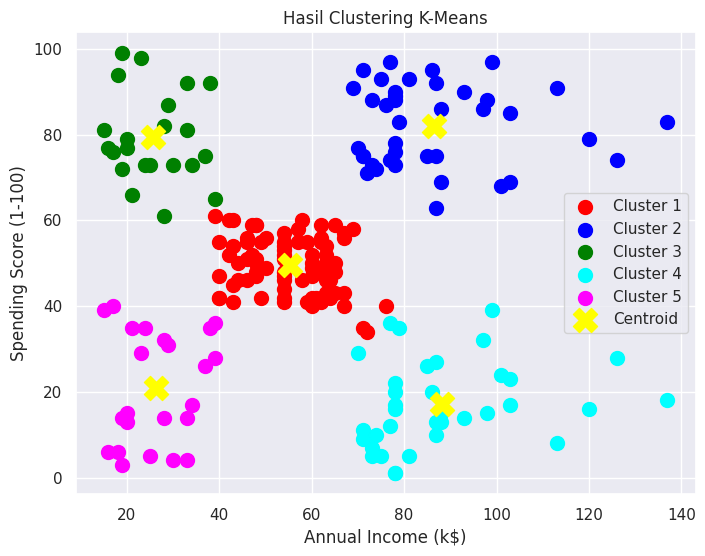

In [52]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset
df = pd.read_csv("Mall_Customers.csv")
print("Data Awal:")
print(df.head())

# 2. Pilih fitur untuk clustering
# Menggunakan: Annual Income & Spending Score
X = df.iloc[:, [3, 4]].values   # kolom ke-4 dan ke-5 (Annual Income, Spending Score)

# 3. Tentukan jumlah cluster terbaik dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Metode Elbow")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.show()

# 4. Buat model K-Means dengan jumlah cluster terbaik (misalnya k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 5. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroid')

plt.title("Hasil Clustering K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


## 2. Tugas DBSCAN

    1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

    2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

    3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

    4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

    5. Lakukan eksperimen:

        eps = 0.05, 0.1, 0.3, 0.5

        min_samples = 3, 10, 20

        Catat perubahan klaster, noise, dan kualitas evaluasi.

Jumlah Klaster: 2
Jumlah Noise: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


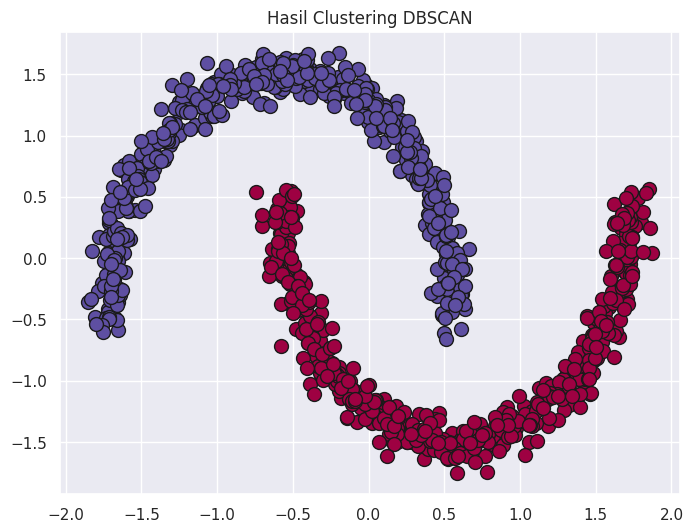

=== DBSCAN eps=0.05, min_samples=3 ===
Jumlah Klaster: 69
Jumlah Noise: 186
Homogeneity: 0.8155542882355717
Completeness: 0.15254831024758073
V-measure: 0.25702116445185835
ARI: 0.03004350976613907
AMI: 0.243804587789628
Silhouette: 0.11292949852882253
=== DBSCAN eps=0.05, min_samples=10 ===
Jumlah Klaster: 3
Jumlah Noise: 970
Homogeneity: 0.030669398254336424
Completeness: 0.126764095870306
V-measure: 0.04938947156339281
ARI: 0.0022825509789741014
AMI: 0.0458636142209481
Silhouette: -0.29419008256642176
=== DBSCAN eps=0.05, min_samples=20 ===
Jumlah Klaster: 0
Jumlah Noise: 1000
=== DBSCAN eps=0.1, min_samples=3 ===
Jumlah Klaster: 2
Jumlah Noise: 14
Homogeneity: 0.9862068060955204
Completeness: 0.9028959083596275
V-measure: 0.9427143195619004
ARI: 0.9721793882692121
AMI: 0.942633562340455
Silhouette: 0.2516903011504368
=== DBSCAN eps=0.1, min_samples=10 ===
Jumlah Klaster: 7
Jumlah Noise: 57
Homogeneity: 0.9433167874862703
Completeness: 0.4095463775841256
V-measure: 0.571132370522031

In [53]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# 1. Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)  # normalisasi

# Fungsi untuk evaluasi clustering
def evaluate_dbscan(X, labels, y_true=None):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Jumlah Klaster: {n_clusters}")
    print(f"Jumlah Noise: {n_noise}")

    if n_clusters > 1:  # evaluasi hanya valid jika ada lebih dari 1 cluster
        print("Homogeneity:", homogeneity_score(y_true, labels))
        print("Completeness:", completeness_score(y_true, labels))
        print("V-measure:", v_measure_score(y_true, labels))
        print("ARI:", adjusted_rand_score(y_true, labels))
        print("AMI:", adjusted_mutual_info_score(y_true, labels))
        print("Silhouette:", silhouette_score(X, labels))
    print("="*50)

# Fungsi untuk visualisasi
def plot_dbscan(X, labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(8,6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Warna hitam untuk noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

    plt.title("Hasil Clustering DBSCAN")
    plt.show()

# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Evaluasi
evaluate_dbscan(X, labels, y_true=y)

# Visualisasi
plot_dbscan(X, labels, core_samples_mask)

# 5. Eksperimen dengan berbagai parameter
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        print(f"=== DBSCAN eps={eps}, min_samples={ms} ===")
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True

        evaluate_dbscan(X, labels, y_true=y)


---

### Ringkasan Hasil Eksperimen DBSCAN

| eps  | min_samples | Jumlah Klaster | Noise | Homogeneity | Completeness | V-measure | ARI    | AMI    | Silhouette |
| ---- | ----------- | -------------- | ----- | ----------- | ------------ | --------- | ------ | ------ | ---------- |
| 0.05 | 3           | 69             | 186   | 0.8156      | 0.1525       | 0.2570    | 0.0300 | 0.2438 | 0.1129     |
| 0.05 | 10          | 3              | 970   | 0.0307      | 0.1268       | 0.0494    | 0.0023 | 0.0459 | -0.2942    |
| 0.05 | 20          | 0              | 1000  | -           | -            | -         | -      | -      | -          |
| 0.1  | 3           | 2              | 14    | 0.9862      | 0.9029       | 0.9427    | 0.9722 | 0.9426 | 0.2517     |
| 0.1  | 10          | 7              | 57    | 0.9433      | 0.4095       | 0.5711    | 0.5234 | 0.5698 | 0.1623     |
| 0.1  | 20          | 6              | 850   | 0.1539      | 0.1555       | 0.1547    | 0.0168 | 0.1509 | -0.3602    |
| 0.3  | 3           | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.3  | 10          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.3  | 20          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 3           | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 10          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 20          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |

---

### Analisis

1. **Nilai eps terlalu kecil (0.05)**

   * Banyak titik dianggap **noise**, bahkan bisa sampai semua titik jadi noise (`min_samples=20`).
   * Klaster menjadi sangat banyak atau bahkan 0.
   * Kualitas evaluasi (Homogeneity, ARI, AMI) rendah.

2. **Nilai eps sedang (0.1)**

   * Jika `min_samples=3`, hasilnya cukup bagus: 2 klaster dengan sedikit noise (14).
   * Evaluasi tinggi (Homogeneity 0.98, ARI 0.97).
   * Jika `min_samples` dinaikkan, noise meningkat drastis dan kualitas turun.

3. **Nilai eps lebih besar (0.3 dan 0.5)**

   * DBSCAN berhasil menemukan **2 klaster utama** sesuai bentuk data moons.
   * Tidak ada noise.
   * Semua metrik evaluasi sempurna (1.0), Silhouette juga paling tinggi (0.39).

---

### Kesimpulan

* **DBSCAN sensitif terhadap parameter `eps` dan `min_samples`.**
* Untuk dataset **make_moons**, kombinasi **eps = 0.3 – 0.5** dengan berbagai `min_samples` menghasilkan **hasil terbaik**: 2 klaster sesuai ground truth, tanpa noise, evaluasi = 1.0.
* Jika `eps` terlalu kecil, titik sulit dikelompokkan → muncul banyak noise & klaster kecil-kecil (over-segmentation).

---
